# generating figure one (cd)

In [27]:
from lib.my_initialization import *
from lib import *
from lib.utils.merge_cloud_results import *
import seaborn as sns
from scipy.interpolate import CubicSpline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
#TODO: measure net displacements of all particles in an _unwrap.csv trajectory file
file="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.0005/all_traj_longer_than_500.csv"
# file="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.0005/trajectories_unwrap/ic018.21_traj_sr_600_mem_0_unwrap.csv"
df=pd.read_csv(file)
df.head()

,t,x,y,frame,particle
0,1384.1,0.000000,0.000000,642,250
1,1386.1,0.375838,0.289005,643,250
2,1388.1,0.876190,0.213254,644,250
3,1390.1,1.512380,0.130534,645,250
4,1392.1,-0.098148,0.883394,646,250


In [34]:
#map particle to times of birth-death
e=df.groupby('particle').t.describe()[['max','min']]
particle_lifetimes=e['max']-e['min']
particle_lifetimes
t_births=e['min'];t_deaths=e['max']

#TODO: map particle to net displacement in x
e=df.groupby('particle').t.describe()[['max','min']]
particle_lifetimes=e['max']-e['min']

In [39]:
df.groupby('particle').x.tail(1)

354       92.343028
659      -58.233743
918      -21.870531
1347     -11.465473
1617     -22.490101
            ...    
110452    35.252942
110712    96.945128
110968    33.780299
111232   -27.939761
111498   -89.637014
Name: x, Length: 381, dtype: float64

In [41]:
DS=0.025
particle_disp_x=DS*(df.groupby('particle').x.tail(1).values-df.groupby('particle').x.head(1).values)
particle_disp_y=DS*(df.groupby('particle').y.tail(1).values-df.groupby('particle').y.head(1).values)
particle_ranges=np.sqrt(particle_disp_x**2 + particle_disp_y**2 )

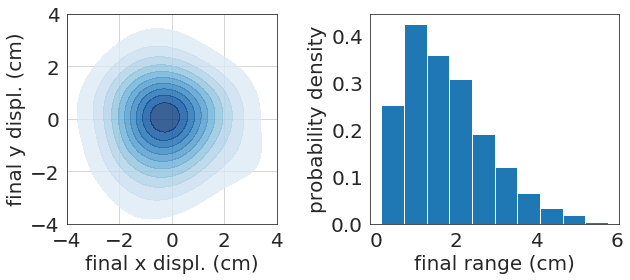

In [130]:
fontsize=20
fig,axs=plt.subplots(ncols=2,figsize=(9,4))

ax=axs[0]
#TODO(later): plot a couple trajectories in gray with initial/final positions colored green/red


#plot heatmap

x=particle_disp_x
y=particle_disp_y
# ax.hist2d(x, y, bins=(15, 15), cmap=plt.cm.BuPu)
sns.kdeplot(x,y,ax=ax,cmap="Blues", shade=True,shade_lowest=False,alpha=0.8,bw=.9)
ax.set_xlabel(r'final x displ. (cm)', fontsize=fontsize)
ax.set_ylabel(r'final y displ. (cm)', fontsize=fontsize)
# ax.set_xlabel(r'$\Delta$x (cm)', fontsize=fontsize)
# ax.set_ylabel(r'$\Delta$y (cm)', fontsize=fontsize)
ax.set_xticks(np.arange(-4,5,2))
ax.set_yticks(np.arange(-4,5,2))
ax.axis([-4,4,-4,4])
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
ax.grid('on')
ax.set_aspect('equal')

ax=axs[1]
ax.hist(particle_ranges,bins=10,density=True)
ax.set_xlabel(r'final range (cm)', fontsize=fontsize)
# ax.hist(particle_ranges,bins=10,density=True)
# ax.set_xlabel('range of spiral tip (cm)', fontsize=fontsize)
ax.set_ylabel('probability density', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)

plt.tight_layout()
plt.show()

sns.kdeplot?
kwargs : key, value pairings
    Other keyword arguments are passed to ``plt.plot()`` or
    ``plt.contour{f}`` depending on whether a univariate or bivariate
    plot is being drawn
    
kernel : {'gau' | 'cos' | 'biw' | 'epa' | 'tri' | 'triw' }, optional
    Code for shape of kernel to fit with. Bivariate KDE can only use
    gaussian kernel.
bw : {'scott' | 'silverman' | scalar | pair of scalars }, optional
    Name of reference method to determine kernel size, scalar factor,
    or scalar for each dimension of the bivariate plot. Note that the
    underlying computational libraries have different interperetations
    for this parameter: ``statsmodels`` uses it directly, but ``scipy``
    treats it as a scaling factor for the standard deviation of the
    data.`

In [134]:
np.mean(particle_ranges)
np.median(particle_ranges)
# np.std(particle_ranges)

1.5264559772969253

In [24]:
group=df.groupby('particle')
ef=group[['x','y','t']].tail(1).copy()
ef['x']*=DS
ef['y']*=DS
# ef['t'] contains the time of death
ef['t_lifetimes']=particle_lifetimes
ef.head()

,x,y,t,t_lifetimes
28,-0.498817,-0.227652,156.1,50.865027
83,-0.073645,0.183584,208.1,NaN
100,0.058752,0.053175,132.1,NaN
117,0.025494,0.279820,132.1,NaN
124,-0.127706,0.154658,112.1,NaN


In [ ]:
group['R']=np.sqrt(particle_disp_x**2 + particle_disp_y**2 )